In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np


In [3]:
np.random.seed(156)
img_size = (224,224)
batch_size = 64

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../Dataset_3",
    validation_split= 0.2,
    subset='training',
    seed=123,
    image_size= img_size,
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../../Dataset_3",
    validation_split= 0.2,
    subset='validation',
    seed=123,
    image_size= img_size,
    batch_size=batch_size
)

Found 25077 files belonging to 2 classes.
Using 20062 files for training.
Found 25077 files belonging to 2 classes.
Using 5015 files for validation.


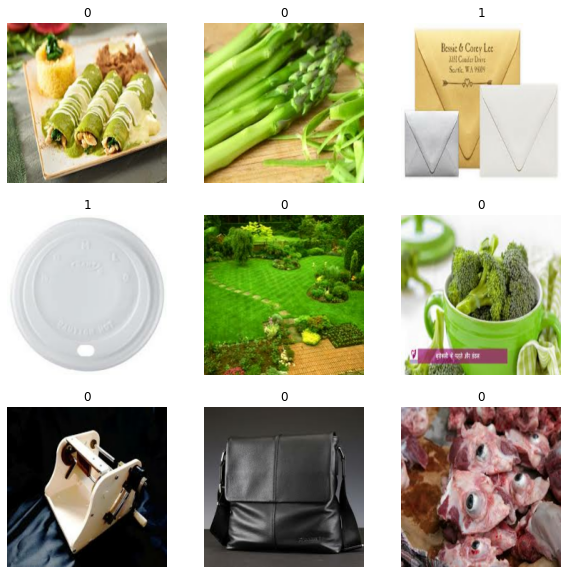

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

plt.show()

In [6]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")


def plot_hist_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")

In [7]:
data_aug = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal"),
     layers.experimental.preprocessing.RandomRotation(0.125),
    ],
    name = "aug_layer"
)

In [8]:
mainmodel = tf.keras.applications.EfficientNetB0(
            input_shape= (224,224,3),
            weights='imagenet',
            include_top= False,
            )

In [9]:
model = tf.keras.Sequential(
    [
        keras.Input(shape=(224,224,3)),
        data_aug,
        mainmodel,
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout (0.5),
        keras.layers.Dense(1,activation='relu'),

    ]
)
mainmodel.trainable = False

In [10]:
for layer in model.layers[-20:]:
            if not isinstance(layer,layers.BatchNormalization):
                layer.trainable = True

In [11]:
#hyperparameter : l_rate,batch_size,epoch, optimizer

In [12]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer= optimizer, loss='binary_crossentropy',metrics=['accuracy'])

stopper = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max',patience= 5)

In [13]:
model_run = model.fit(train_ds, validation_data=test_ds, epochs=35)

Epoch 1/35
314/314 [==============================] - 229s 678ms/step - loss: 3.1639 - accuracy: 0.7392 - val_loss: 1.5232 - val_accuracy: 0.8694
Epoch 2/35
314/314 [==============================] - 198s 630ms/step - loss: 1.9267 - accuracy: 0.8493 - val_loss: 1.2781 - val_accuracy: 0.8953
Epoch 3/35
314/314 [==============================] - 198s 628ms/step - loss: 1.5042 - accuracy: 0.8825 - val_loss: 1.1544 - val_accuracy: 0.9091
Epoch 4/35
314/314 [==============================] - 204s 647ms/step - loss: 1.3812 - accuracy: 0.8945 - val_loss: 1.0038 - val_accuracy: 0.9230
Epoch 5/35
314/314 [==============================] - 201s 639ms/step - loss: 1.2426 - accuracy: 0.9036 - val_loss: 1.0085 - val_accuracy: 0.9206
Epoch 6/35
314/314 [==============================] - 202s 640ms/step - loss: 1.4185 - accuracy: 0.8962 - val_loss: 1.4478 - val_accuracy: 0.8899
Epoch 7/35
314/314 [==============================] - 202s 642ms/step - loss: 1.3664 - accuracy: 0.8986 - val_loss: 1.3716 -

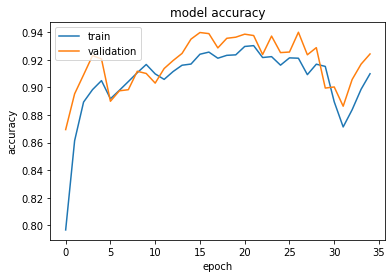

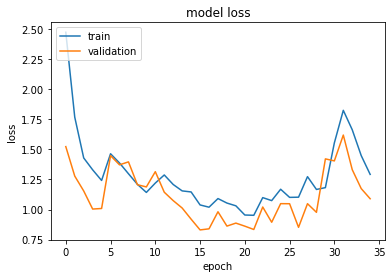

79/79 [==============================] - 14s 172ms/step - loss: 1.0896 - accuracy: 0.9242


In [14]:
plot_hist(model_run)
plt.savefig('Accuracy Curve')
plt.show()

plot_hist_loss(model_run)
plt.savefig('Loss Curve')
plt.show()


performance = model.evaluate(test_ds)